# Best Place for Homer Simpson to Live: Bars

<img src="https://www.animationconnection.com/assets/artwork/1592931864-188-5096-homer-simpson-and-moe-at-bar-pondering.jpg" alt="Homer Simpson sitting at a bar" title="Homer at the Bar" />

### Homer Simpson loves beer, so the best neighborhood in Pittsburgh would have to have the most bars in order to make it the most accessible.

#### In order to figure this out, I used the assets data set. More specifically, I honed in on the section pertaining to restaurants selling alcoholic beverages.

In [2]:
import pandas as pd
import numpy as np
import geopandas as gp
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors

#### I read in the data file and then deduced what the bars and restaurants were titled in the columns

In [3]:
foodFacilities = pd.read_csv("Geocoded Food Facilities.csv")

In [4]:
description = pd.DataFrame(foodFacilities['description'])
dropDupes = description.drop_duplicates()
storesWithLiquor = dropDupes.loc[description['description'].str.contains("(?i)with liquor")]

In [5]:
storesWithLiquor.head(10)

,description
2,Restaurant with Liquor
6,Firehall with Liquor
28,Chain Restaurant with Liquor
595,Pool Snack Bar/With Liquor


#### Here I separated the bars and restaurants from the rest of the data

In [6]:
typeOfPlace = foodFacilities.loc[foodFacilities['description'] == "Restaurant with Liquor"]
typeOfPlace = pd.concat([typeOfPlace,foodFacilities.loc[foodFacilities['description'] == "Chain Restaurant with Liquor"]])
typeOfPlace = pd.concat([typeOfPlace,foodFacilities.loc[foodFacilities['description'] == "Firehall with Liquor"]])
typeOfPlace = pd.concat([typeOfPlace,foodFacilities.loc[foodFacilities['description'] == "Pool Snack Bar/With Liquor"]])
typeOfPlace.sample(3)

,id,facility_name,num,street,city,state,zip,municipal,category_cd,description,...,bus_st_date,bus_cl_date,seat_count,noroom,sq_feet,status,placard_st,x,y,address
11671,200311050002,The Locker Room,734,Brookline Blvd (Basement),Pittsburgh,PA,15226.0,Pittsburgh-119,201,Restaurant with Liquor,...,2003-10-21,NaN,30.0,NaN,NaN,7,NaN,-80.020727,40.393990,734 Brookline Blvd (Basement) PA 15226
11009,200411290002,Rotelli,2801,Freeport Rd,Pittsburgh,PA,15238.0,Harmar,202,Chain Restaurant with Liquor,...,2004-11-17,NaN,177.0,NaN,NaN,7,NaN,-79.832184,40.538328,2801 Freeport Rd PA 15238
7753,41961,MSE Healthy Choice/Mr Pockets,1165,McKinney Ln @ Pkwy Ctr Mall,Pittsburgh,PA,15220.0,Pittsburgh-120,201,Restaurant with Liquor,...,1987-01-01,NaN,0.0,NaN,NaN,7,NaN,-80.035023,40.423001,1165 McKinney Ln @ Pkwy Ctr Mall PA 15220


In [7]:
typeOfPlace = typeOfPlace.loc[typeOfPlace['city'] == 'Pittsburgh']

addr = typeOfPlace["address"]
municipal = typeOfPlace['municipal']

addr = pd.concat([addr,municipal],axis=1)

#### Removed irrelevent data and removed data that was not labeled as in the city of Pittsburgh

In [8]:
typeOfPlace = typeOfPlace.drop(columns=['id','facility_name','street','state','zip','category_cd','description','p_code','bus_st_date','seat_count','noroom','sq_feet','status','placard_st','x','y','city','address','fdo','bus_cl_date'])
numberOfBars = typeOfPlace.groupby("municipal").count()


#### Renamed municipals

In [9]:
row_labels = {"Pittsburgh-111":"Garfield","Pittsburgh-112":"Larimer","Pittsburgh-113":"Homewood","Pittsburgh-114":"Squirrel Hill","Pittsburgh-115":"Greenfield","Pittsburgh-116":"South Side Slopes","Pittsburgh-117":"South Side Flats","Pittsburgh-118":"Allentown","Pittsburgh-119":"South Shore","Pittsburgh-120":"Banksville","Pittsburgh-121":"Chateau","Pittsburgh-122":"Allegheny Center","Pittsburgh-123":"East Allegheny","Pittsburgh-124":"Spring Hill City View","Pittsburgh-125":"Central North Side","Pittsburgh-126":"Perry South","Pittsburgh-127":"Marshall Shadeland","Pittsburgh-128":"Oakwood","Pittsburgh-129":"Carrick","Pittsburgh-130":"Knoxville","Pittsburgh-131":"Lincoln Place","Pittsburgh-132":"Overbrook","Pittsburgh-101":"Downtown","Pittsburgh-102":"Downtown","Pittsburgh-103":"Downtown","Pittsburgh-104":"Oakland","Pittsburgh-105":"Middle Hill","Pittsburgh-106":"Polish Hill","Pittsburgh-107":"Shadyside","Pittsburgh-108":"Bloomfield","Pittsburgh-109":"Central Lawrenceville","Pittsburgh-110":"Upper Lawrenceville"}
numberOfBars.rename(index = row_labels, inplace=True)
row_labels = {"Allegheny Center":"Allegheny West","Allentown":"Allentown","Banksville":"Banksville","Bloomfield":"Bloomfield","Downtown":"Central Business District","Downtown":"Central Business District","Downtown":"Central Business District","Oakland":"Central Oakland"}
numberOfBars.rename(index = row_labels, inplace=True)
numberOfBars.head(10)

,num
municipal,
Aspinwall,23
Avalon,14
Baldwin Boro,42
Baldwin Twp,11
Bellevue,5
Ben Avon Hgts,1
Bethel Park,31
Blawnox,9
Braddock Hills,11


In [10]:
numberOfBars = numberOfBars.groupby(['municipal']).sum()

In [11]:
numberOfBars = numberOfBars.sort_values(ascending=False,by="num")

In [12]:
neighborhoods = gp.read_file("neighborhood_data/Neighborhoods_.shp")

In [13]:
barsMap = neighborhoods.merge(numberOfBars, how='left', left_on='hood', right_on='municipal')

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,page_numbe,plannerass,created_us,created_da,last_edite,last_edi_1,Shape__Are,Shape__Len,geometry,num
0,1,0.0,42,003,040500,1,420030405001,Block Group 1,G5030,S,...,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.842997e+06,11525.904546,"POLYGON ((-79.95304 40.44203, -79.95302 40.442...",104.0
1,2,1.0,42,003,040400,1,420030404001,Block Group 1,G5030,S,...,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.390469e+07,20945.562570,"POLYGON ((-79.95455 40.45882, -79.95427 40.458...",NaN
2,3,2.0,42,003,040200,2,420030402002,Block Group 2,G5030,S,...,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,5.998649e+06,18280.484515,"POLYGON ((-79.96230 40.44294, -79.96220 40.442...",NaN
3,4,3.0,42,003,030500,2,420030305002,Block Group 2,G5030,S,...,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.203337e+06,15697.914337,"POLYGON ((-79.98275 40.44641, -79.98273 40.446...",NaN
4,5,5.0,42,003,020300,1,420030203001,Block Group 1,G5030,S,...,15,Andrea Lavin Kossis,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.694875e+07,24019.532672,"POLYGON ((-79.97494 40.45629, -79.97484 40.456...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,88,298.0,42,003,563100,3,420035631003,Block Group 3,G5030,S,...,15,Sophia Robison,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.024662e+07,16308.779881,"POLYGON ((-80.03431 40.43366, -80.03424 40.433...",NaN
86,89,32.0,42,003,562600,1,420035626001,Block Group 1,G5030,S,...,15,Sophia Robison,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,5.579476e+06,18778.991513,"POLYGON ((-80.02869 40.44454, -80.02845 40.444...",NaN
87,90,57.0,42,003,250700,1,420032507001,Block Group 1,G5030,S,...,15,Stephanie Joy Everett,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,6.050817e+06,11709.518764,"POLYGON ((-80.02039 40.46285, -80.02022 40.462...",NaN
88,91,96.0,42,003,562300,2,420035623002,Block Group 2,G5030,S,...,15,Ose Akinlotan,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.271295e+07,18931.494331,"POLYGON ((-79.92030 40.41205, -79.92027 40.412...",NaN


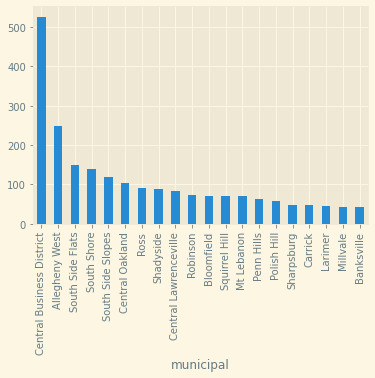

In [14]:
plt.style.use('Solarize_Light2')
numberOfBars.head(20).plot(kind='bar', legend=False)

### As we can see from the bar graph, the Central Business District aka Downtown has the most amount of bars and restaurants that serve alcohol

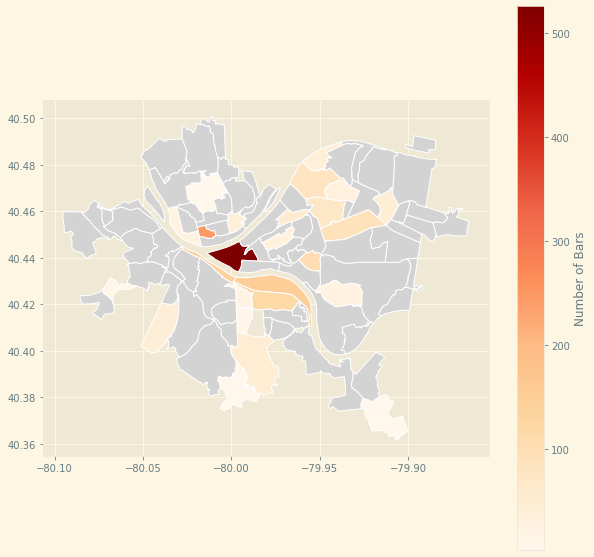

In [15]:
barsMap.plot(column='num', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Bars"}, # label the legend
               figsize=(10, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

### Here we can see how Downtown compares to its neighbors

Based on the information we have about bars, Downtown is clearly the best neighborhood in Pittsburgh since it is densely packed with bars and restaurants that serve alcohol. Looking at the bar graph, one can clearly tell that the majority of neighborhoods in Pittsburgh seem to have less than a fifth of the amount of bars in Downtown.

The top five places include 
1. Downtown
2. Allegheny West
3. Southside Flats
4. South Shore
5. South Side Slopes

Considering the close proximity of Southside Flats, South Shore, and South Side Slopes, one may deduce that it could be a preferable second choice to live over Allegheny West. However, even adding together those neighborhoods, there would still be less bars than in the entire downtown area especially if judging distance.

My favorite neighborhood in Pittsburgh is probably Squirrel Hill because I like to walk around in the interesting and expensive neighborhoods. Overall, Squirrel Hill's amount of bars is not too different than the average neighborhood, but it does place at number 12.